# GCNによる学習ノード選択

デフォルトはノード0,4,8,24が教師データ

! conda activate kmedoids

In [25]:

import time
import networkx as nx
from torch_geometric.utils.convert import to_networkx, from_networkx
from torch_geometric.datasets import KarateClub
import matplotlib.pyplot as plt
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import gcn_node_selectable as gcn
from gcn_node_selectable import GCN
import numpy as np
from sklearn_extra.cluster import KMedoids #K-Medoids
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score #ARI
import random
import sys
from statistics import stdev
import warnings

warnings.filterwarnings("ignore")


In [26]:
LOUVAIN = "LOUVAIN"
KARATE = "KARATE"
K4 = "K4"




In [27]:
#すべてを学習データで学習させるか
TRAIN_ALL = False

# デフォルトの一部の学習データ(ノード0,4,8,24)で学習させるか。Falseの場合ランダム
DEFAULT = False

#ランダムのデータで学習する場合の学習データ(ノード情報)数[Mr.Hi , Officer]
NUM_TRAIN = [3,3]

#エポック数
EPOCH = 40

#学習状況及び結果を図示するか
VIEW_TRAIN = False

#埋め込み結果、クラスタリング結果を表示するか
VIEW_CLUSTERING = True

#実行回数
TIMES = 1

#  クラスタ数
N_CLUSTER = 2

#GCNの学習に使う教師データ KARATE or LOUVAIN
TRUE_LABEL = KARATE

#クラスタリングに用いる手法
METHOD = "kmedoids"






#==========================================================

if NUM_TRAIN[0]>14 or NUM_TRAIN[1]>14 :
    sys.exit("ノード数は34以下の必要があります")

if TRUE_LABEL == LOUVAIN:
    TRUE_LABEL = gcn.read_csv("louvain.txt")
    
elif TRUE_LABEL == KARATE:
    TRUE_LABEL = gcn.draw_karateclub()
    
elif TRUE_LABEL==K4 :
    TRUE_LABEL = KarateClub()[0].y.detach().numpy()
    



In [28]:
gcn.get_random_train_mask(34,[17,17],TRUE_LABEL)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True])

Hi : 0 , of : 0


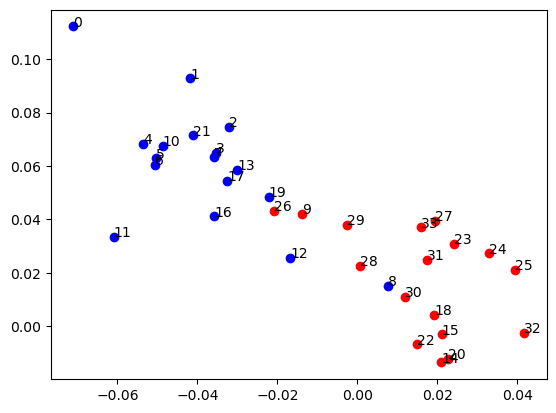

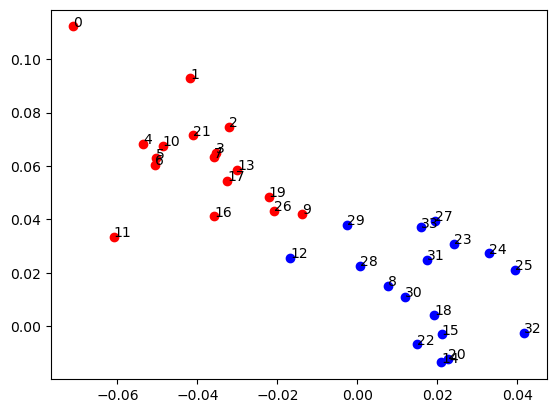

平均ARI : 0.5717993079584776
Hi : 0 , of : 1


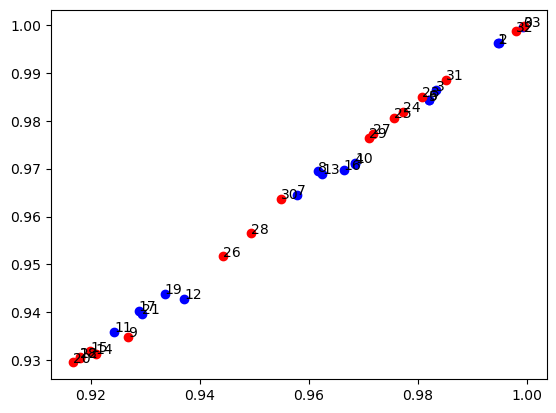

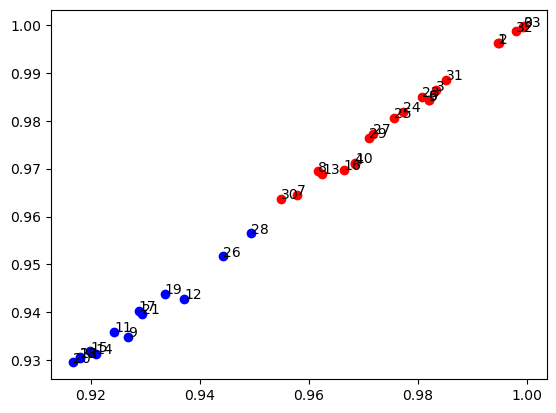

平均ARI : 0.0025906735751295338
Hi : 1 , of : 0


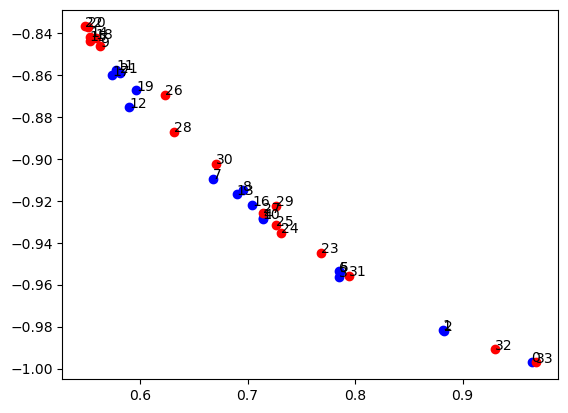

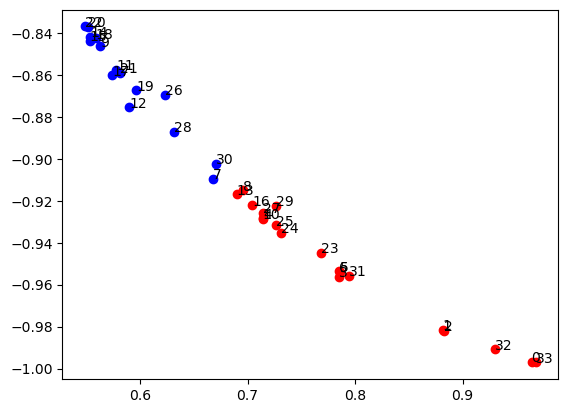

平均ARI : 0.0012970168612191958
Hi : 1 , of : 1


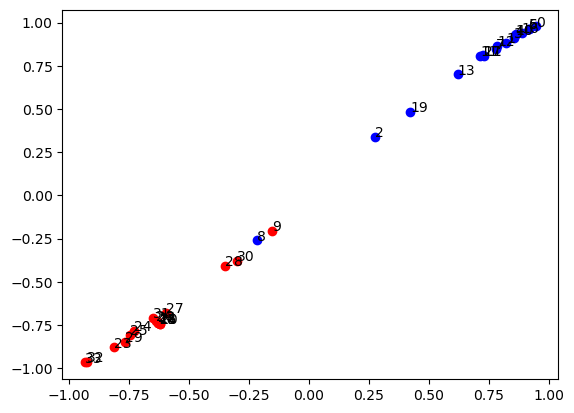

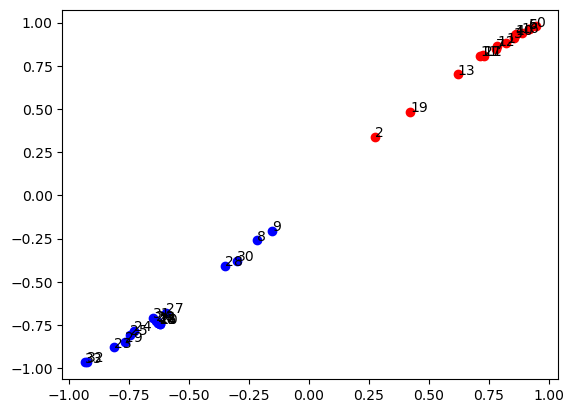

平均ARI : 0.8822575413558222
Hi : 16 , of : 0


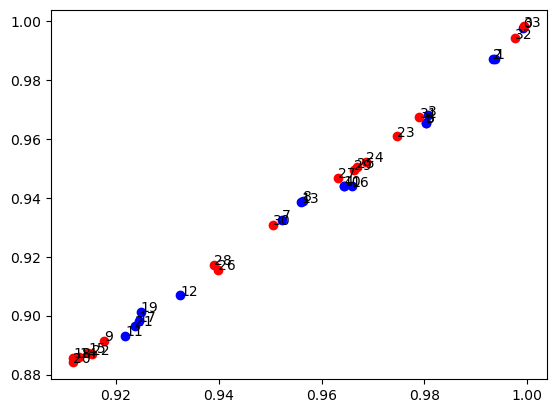

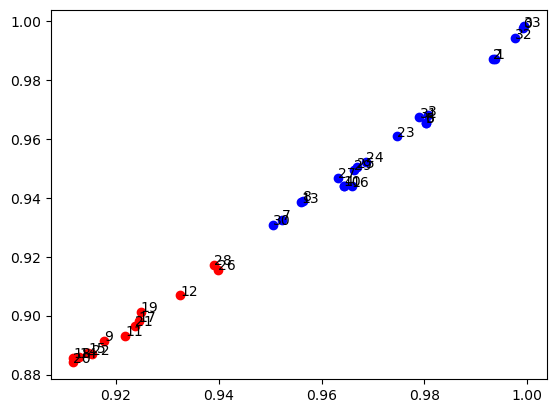

平均ARI : 0.0025906735751295338
Hi : 16 , of : 1


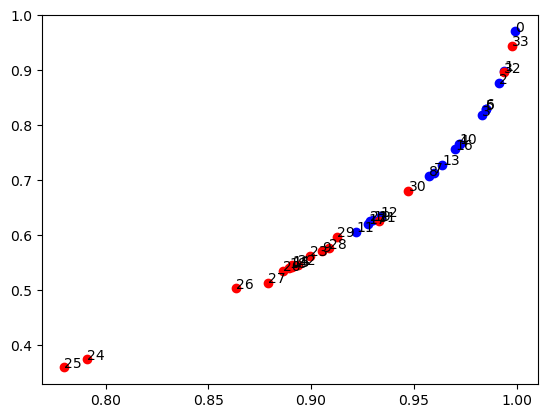

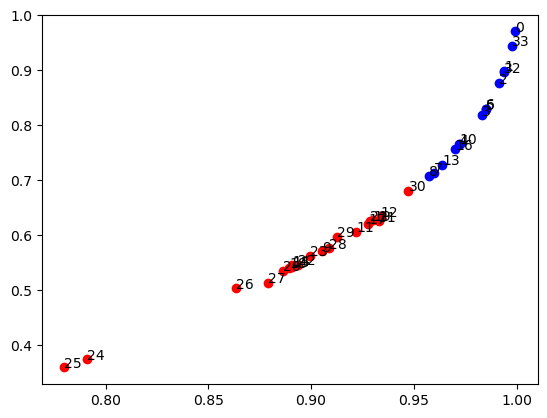

平均ARI : 0.326239602463001
Hi : 17 , of : 0


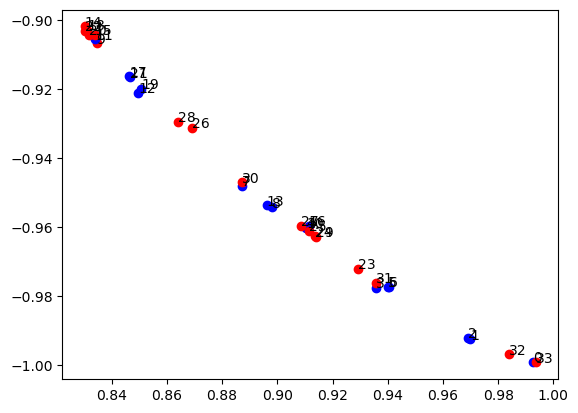

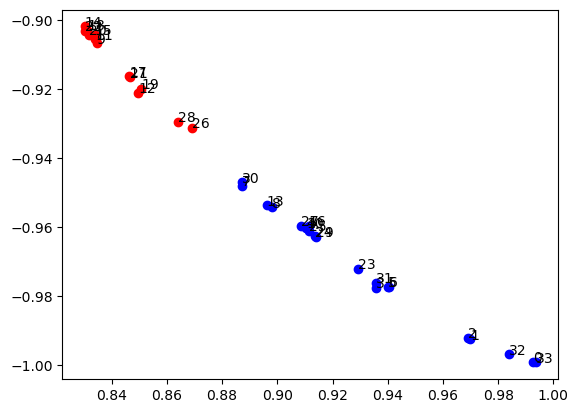

平均ARI : 0.0025906735751295338
Hi : 17 , of : 1


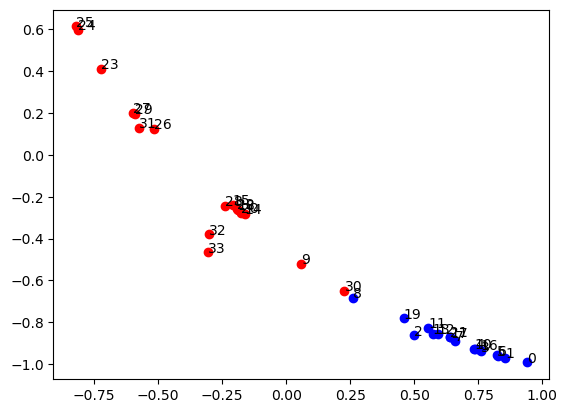

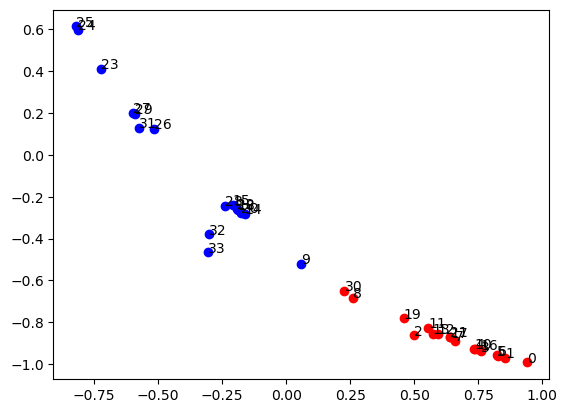

平均ARI : 0.8822575413558222


In [35]:
for hi in [0,1,16,17]:
    for of in [0,1]:
        print(f"Hi : {hi} , of : {of}")
        NUM_TRAIN=[hi,of]
        _, _, _, _, _, = gcn.exec_to_kmedoids(TIMES, TRAIN_ALL, DEFAULT, NUM_TRAIN, EPOCH,
                                              VIEW_TRAIN, VIEW_CLUSTERING, N_CLUSTER, TRUE_LABEL, METHOD)


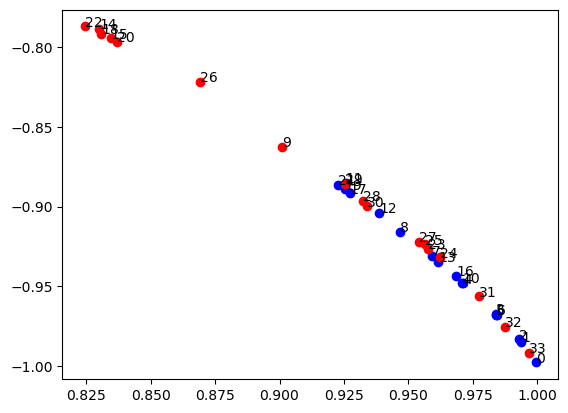

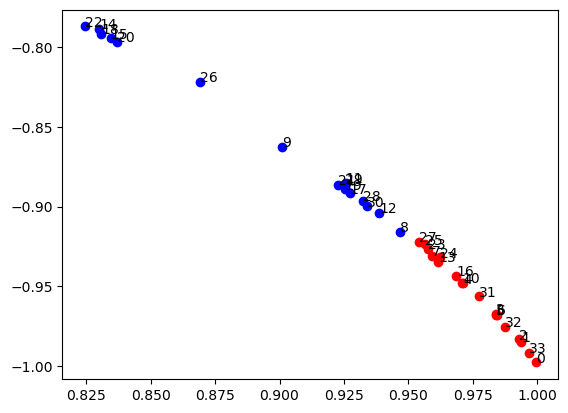

平均ARI : 0.025948751216347713


In [30]:

_, _, _, _, _, = gcn.exec_to_kmedoids(TIMES, TRAIN_ALL, DEFAULT, NUM_TRAIN, EPOCH,
                             VIEW_TRAIN, VIEW_CLUSTERING, N_CLUSTER, TRUE_LABEL, METHOD)



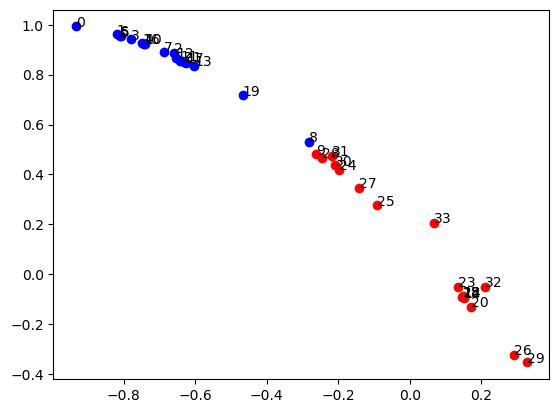

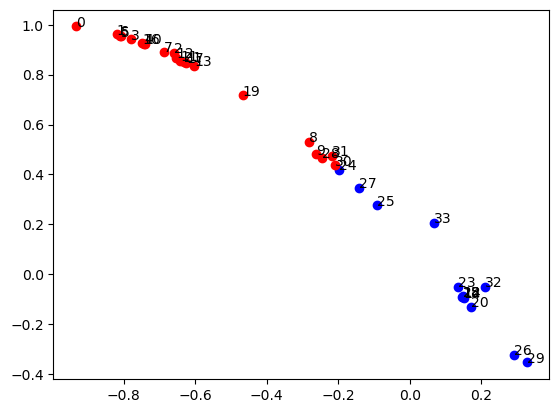

平均ARI : 0.572538860103627


In [31]:
ARI_list, max_EVM, min_EVM ,max_pred, min_pred = gcn.exec_to_kmedoids(TIMES,TRAIN_ALL,DEFAULT,NUM_TRAIN,EPOCH,VIEW_TRAIN,VIEW_CLUSTERING,N_CLUSTER,TRUE_LABEL,METHOD)

In [32]:
name = "gcn_"+str(N_CLUSTER)+".txt"
with open(name,'w') as f:
    for i in range(len(max_pred)):
        if i+1 == len(max_pred):
            f.write(str(max_pred[i]))
        else:
            f.write(str(max_pred[i])+',')
